In [2]:
import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
getattr(ssl, '_create_unverified_context', None)):
    ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
import numpy as np
import csv
import pandas as pd

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [61]:
def loadweekonline(weeknumber):
    
    url = 'https://raw.githubusercontent.com/oliverkpan/fan_hockey/master/w%s.csv' % weeknumber 
    results = np.array(pd.read_csv(url,header=None))

    return results

# load a file
w1 = loadweekonline(2)
        
# show results
print(w1)

[[ 13.     20.     -9.     17.    104.     27.      5.      2.6     0.918
    0.   ]
 [  9.     27.      6.     15.    106.     32.      3.      2.71    0.906
    1.   ]
 [ 13.     16.     -8.     10.     95.     54.      3.      2.58    0.928
    1.   ]
 [  6.     13.     -1.      5.     78.     32.      3.      2.7     0.914
    0.   ]
 [ 15.     15.      6.      8.    133.     33.      0.      4.06    0.852
    0.   ]
 [  9.     25.      9.     15.     95.     55.      3.      2.39    0.919
    0.   ]
 [  8.     22.     12.     13.     88.     39.      2.      1.98    0.927
    1.   ]
 [ 13.     17.     -5.      6.    121.     49.      3.      2.7     0.919
    0.   ]]


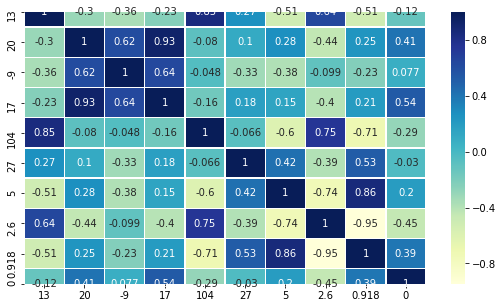

In [63]:
url = 'https://raw.githubusercontent.com/oliverkpan/fan_hockey/master/w2.csv'
df = pd.read_csv(url)
    
plt.figure(figsize=(9,5))
sns.heatmap(df.corr(),annot=True,linewidth = 0.5, cmap="YlGnBu")

In [64]:
names = ['Brekane Ankles','Dirty Stache','Hotdog Man','Ians Team','Clifs Champion Team','The Pastries','Jonathans Team2','Pandas Team']
cats = ['G', 'A', '+/-', 'PPP', 'SOG', 'Hits', 'W', 'GAA', "SV%", 'SO']

#Display Headers
hockey = pd.DataFrame(w1, index=names, columns=cats)

In [65]:
hockey

,G,A,+/-,PPP,SOG,Hits,W,GAA,SV%,SO
Brekane Ankles,13.0,20.0,-9.0,17.0,104.0,27.0,5.0,2.60,0.918,0.0
Dirty Stache,9.0,27.0,6.0,15.0,106.0,32.0,3.0,2.71,0.906,1.0
Hotdog Man,13.0,16.0,-8.0,10.0,95.0,54.0,3.0,2.58,0.928,1.0
Ians Team,6.0,13.0,-1.0,5.0,78.0,32.0,3.0,2.70,0.914,0.0
Clifs Champion Team,15.0,15.0,6.0,8.0,133.0,33.0,0.0,4.06,0.852,0.0
The Pastries,9.0,25.0,9.0,15.0,95.0,55.0,3.0,2.39,0.919,0.0
Jonathans Team2,8.0,22.0,12.0,13.0,88.0,39.0,2.0,1.98,0.927,1.0
Pandas Team,13.0,17.0,-5.0,6.0,121.0,49.0,3.0,2.70,0.919,0.0


In [9]:
def compresultsonline(uptoweek):

    #start by loading the first week    
    results = [loadweekonline(1)]
    
    # now append the other weeks onto results        
    for i in range(uptoweek-1):
        results = np.append(results,[loadweekonline(i+2)],axis=0)
        
    return results


BHLresults = compresultsonline(2)

In [10]:
pd.DataFrame(BHLresults[:,1,1]).transpose()

,0,1
0,36.0,27.0


In [66]:
hockey.head()

,G,A,+/-,PPP,SOG,Hits,W,GAA,SV%,SO
Brekane Ankles,13.0,20.0,-9.0,17.0,104.0,27.0,5.0,2.60,0.918,0.0
Dirty Stache,9.0,27.0,6.0,15.0,106.0,32.0,3.0,2.71,0.906,1.0
Hotdog Man,13.0,16.0,-8.0,10.0,95.0,54.0,3.0,2.58,0.928,1.0
Ians Team,6.0,13.0,-1.0,5.0,78.0,32.0,3.0,2.70,0.914,0.0
Clifs Champion Team,15.0,15.0,6.0,8.0,133.0,33.0,0.0,4.06,0.852,0.0


In [67]:
hockey.describe()

,G,A,+/-,PPP,SOG,Hits,W,GAA,SV%,SO
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000
mean,10.750000,19.375000,1.250000,11.125000,102.500000,40.125000,2.75000,2.715000,0.910375,0.375000
std,3.150964,4.983903,8.066686,4.517822,17.768351,11.012169,1.38873,0.596035,0.024593,0.517549
min,6.000000,13.000000,-9.000000,5.000000,78.000000,27.000000,0.00000,1.980000,0.852000,0.000000
25%,8.750000,15.750000,-5.750000,7.500000,93.250000,32.000000,2.75000,2.532500,0.912000,0.000000
50%,11.000000,18.500000,2.500000,11.500000,99.500000,36.000000,3.00000,2.650000,0.918500,0.000000
75%,13.000000,22.750000,6.750000,15.000000,109.750000,50.250000,3.00000,2.702500,0.921000,1.000000
max,15.000000,27.000000,12.000000,17.000000,133.000000,55.000000,5.00000,4.060000,0.928000,1.000000


In [68]:
hockey[['W']]

,W
Brekane Ankles,5.0
Dirty Stache,3.0
Hotdog Man,3.0
Ians Team,3.0
Clifs Champion Team,0.0
The Pastries,3.0
Jonathans Team2,2.0
Pandas Team,3.0


In [69]:
hockey[['GAA','SV%']]

,GAA,SV%
Brekane Ankles,2.60,0.918
Dirty Stache,2.71,0.906
Hotdog Man,2.58,0.928
Ians Team,2.70,0.914
Clifs Champion Team,4.06,0.852
The Pastries,2.39,0.919
Jonathans Team2,1.98,0.927
Pandas Team,2.70,0.919


In [70]:
reg = LinearRegression()

In [77]:
x_test, x_train, y_test, y_train = train_test_split(hockey, hockey[['SO']], test_size = .25, random_state = 1)

In [78]:
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
reg.coef_

array([[ 0.00000000e+00, -1.37359905e-03, -4.12079715e-03,
         5.49439620e-03, -3.57135753e-02,  6.86799525e-03,
         0.00000000e+00, -1.64831886e-04,  1.23623915e-05,
         1.37359905e-03]])

In [80]:
a=reg.predict(x_test)

In [81]:
x_test

,G,A,+/-,PPP,SOG,Hits,W,GAA,SV%,SO
Dirty Stache,9.0,27.0,6.0,15.0,106.0,32.0,3.0,2.71,0.906,1.0
Jonathans Team2,8.0,22.0,12.0,13.0,88.0,39.0,2.0,1.98,0.927,1.0
Brekane Ankles,13.0,20.0,-9.0,17.0,104.0,27.0,5.0,2.60,0.918,0.0
Clifs Champion Team,15.0,15.0,6.0,8.0,133.0,33.0,0.0,4.06,0.852,0.0
Ians Team,6.0,13.0,-1.0,5.0,78.0,32.0,3.0,2.70,0.914,0.0
The Pastries,9.0,25.0,9.0,15.0,95.0,55.0,3.0,2.39,0.919,0.0


In [82]:
a

array([[ 0.41070431],
       [ 1.07289964],
       [ 0.52885211],
       [-0.57026861],
       [ 1.40244457],
       [ 0.95058164]])